In [1]:
import datetime
import pytz
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.ticker as mpticker
import pandas as pd
import numpy as np

from pathlib import Path
from mpl_finance import candlestick_ohlc

C:\Anaconda3\envs\dev\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


#### Download Cryptocurrency trading data

In [19]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    Path('../Resources/BTCUSD_1h.csv'),
    index_col="Date")

df = df.iloc[-200:]
df

,Open,Close,High,Low,Volume
Date,,,,,
2021-11-09 18:00:00,66801.000000,66550.000000,67242.0,66550.0,137.539762
2021-11-09 19:00:00,66551.000000,66826.000000,66829.0,66375.0,78.715044
2021-11-09 20:00:00,66825.000000,67352.000000,67352.0,66671.0,163.103837
2021-11-09 21:00:00,67352.000000,67715.000000,67760.0,67264.0,242.156344
2021-11-09 22:00:00,67732.000000,67291.000000,67732.0,66992.0,240.080447
...,...,...,...,...,...
2021-11-17 21:00:00,60437.000000,60118.000000,60437.0,59792.0,120.589089
2021-11-17 22:00:00,60118.298382,59991.000000,60153.0,59690.0,124.865523
2021-11-17 23:00:00,59992.626684,60352.815959,60514.0,59811.0,87.033227


#### Find the optimal K using the Knee plot

C:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


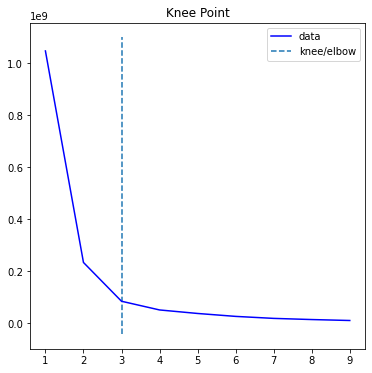

In [21]:
from kneed import KneeLocator

# Turn data in to Numpy array format
X = np.array(df['Close'])

sum_of_sq_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X.reshape(-1,1))
    sum_of_sq_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_sq_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()

In [22]:
# Check the value of K using kn.knee
kn.knee

3

In [23]:
# Fit the model
kmeans = KMeans(n_clusters= kn.knee).fit(X.reshape(-1,1))
c = kmeans.predict(X.reshape(-1,1))
min_and_max = []
for i in range(kn.knee):
    min_and_max.append([-np.inf,np.inf])
for i in range(len(X)):
    cluster = c[i]
    if X[i] > min_and_max[cluster][0]:
        min_and_max[cluster][0] = X[i]
    if X[i] < min_and_max[cluster][1]:
        min_and_max[cluster][1] = X[i]

# Check the min and max values of clusters
min_and_max

[[65476.0, 62507.0], [62083.0, 58948.0], [68601.0, 65557.0]]